In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif, r_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay

In [31]:
def plot_side_by_side(plot1, plot2, title1='', title2=''):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    plot1.plot(ax=axes[0], cmap='Blues')
    axes[0].set_title(title1)
    plot2.plot(ax=axes[1], cmap='Blues')
    axes[1].set_title(title2)
    
    plt.tight_layout()
    plt.show()

In [32]:
def load_data():
    x_train = np.load("x_train.npy")
    y_train = np.load("y_train.npy")
    x_test = np.load("x_test.npy")
    y_test = np.load("y_test.npy")
    return x_train, y_train, x_test, y_test

In [33]:
x_train, y_train, x_test, y_test = load_data()

In [34]:
manual = r_regression(x_train, y_train)
idx = np.argsort(np.abs(manual))
x_train_best= x_train[:,idx[-10:]]
x_test_best= x_test[:,idx[-10:]]
idx[-10:]

array([308, 194, 255, 316, 486,  32, 262, 203, 389, 284], dtype=int64)

In [35]:
mms = MinMaxScaler(feature_range=(0, 1))
x_train_norm = mms.fit_transform(x_train_best)
x_test_norm = mms.transform(x_test_best) # normalize the testing data before testing. Note that we use the model fit using the training data

In [36]:
clf = SVC()
clf.fit(x_train_norm, y_train) # train an SVM using the training data.
print('Training Accuracy: ', clf.score(x_train_norm, y_train)) # Accuracy on the training data
print('Testing Accuracy: ', clf.score(x_test_norm, y_test)) # Accuracy on the testing data

Training Accuracy:  0.6618518518518518
Testing Accuracy:  0.6574074074074074


In [37]:
# Here are some experimentations with kernel changes.
# Attempt 1
clf1 = SVC(kernel='poly', degree=3)
clf1.fit(x_train_norm, y_train)
print(f'Attempt 1: {clf1.score(x_test_norm, y_test)}')

# Attempt 2
clf2 = SVC(kernel='sigmoid')
clf2.fit(x_train_norm, y_train)
print(f'Attempt 2: {clf2.score(x_test_norm, y_test)}')

Attempt 1: 0.55
Attempt 2: 0.31777777777777777


In [38]:
# Here is the only found improvement of performance through hyperparameter tuning. All other parameters function best by default.
clfbest = SVC(C=15)
clfbest.fit(x_train_norm, y_train)
print('Training Accuracy: ', clfbest.score(x_train_norm, y_train))
print('Testing Accuracy: ', clfbest.score(x_test_norm, y_test))

Training Accuracy:  0.6859876543209876
Testing Accuracy:  0.6688888888888889


In [39]:
# Compute cross-validation values
scores = cross_val_score(clfbest, x_test_norm, y_test, cv=10)

In [40]:
# Save model
with open('3_1.pkl', 'wb') as f:
    pickle.dump(clfbest, f)

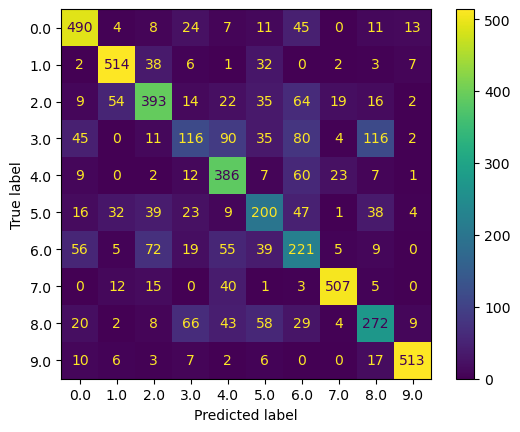

In [41]:
y_pred = clfbest.predict(x_test_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

ii) To manage computational complexity with datasets having many features, use Principal Component Analysis (PCA) before Pearson correlation. PCA reduces dimensionality by transforming data into a lower-dimensional space by selecting a subset of principal components based on explained variance and a set desired number. Applying Pearson correlation on this reduced is more computational manageable while preserving meaningful features.